In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pca import pca
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

This data set contains measurements of monoterpenes in certain plant leaves in AUC/mg.\
Monoterpenes are a class of terpenes that consist of two isoprene units and have the molecular formula C10H16. Monoterpenes may be linear (acyclic) or contain rings (monocyclic and bicyclic). Modified terpenes, such as those containing oxygen functionality or missing a methyl group, are called monoterpenoids. Monoterpenes and monoterpenoids are diverse. They have relevance to the pharmaceutical, cosmetic, agricultural, and food industries.[wikipedai].





This dataset contains 94 rows and 19 columns. The first column is just the id, the second column is the Species and the others are the monoterpenes that are measured.\
The research question: Are there any categories to distinguish between different monoterpenes in a certain plant leaves?\
Is there any model to can predict the spacies with high accuracy based on features?


The best methods are PCA and LDA because both are useful in dimensionality reduction to be able to categorize the samples.\
I believe also LDA is better because we have 3 different species in this dataset and although PCA is like LDA, LDA focuses on maximizing the separability among know categories.\
So at first, I try to see the result of PCA and then LDA.

In [2]:
df=pd.read_csv("metabolom_data.csv ")
df.head()

,SampleID,Species,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
0,MF032,wyoming,17.447216,78.480388,2.575015,0.480588,6.873549,14.667799,10.505447,64.308777,5.311575,6.917810,10.258485,29.725402,5.320274,92.868922,32.733879,245.373027,9.190845
1,MF034,wyoming,0.000000,0.000000,0.566885,9.274434,29.331204,189.922801,20.664100,0.368826,8.201353,140.641077,0.000000,1.275490,0.000000,0.000000,675.617594,13.323675,0.646352
2,MF036,wyoming,13.247976,52.978520,3.838784,0.000000,5.958195,6.564323,23.170531,61.671574,2.010833,4.594991,9.309720,27.877841,10.200175,54.894681,25.178064,232.263740,8.166170
3,MF038,wyoming,0.000000,71.897745,5.582314,7.300492,8.662203,3.662696,9.404492,0.165965,1.854227,6.792163,9.031663,32.740878,7.444111,67.025993,24.894070,392.559512,10.195839
4,MF049,wyoming,15.501606,56.658287,7.009434,0.397118,0.000000,9.505731,11.259664,18.164837,3.222653,17.167722,9.857530,6.071136,10.047028,87.913989,33.114384,0.341623,11.994086


check the different kinds of species

In [3]:
df.Species.unique()

array(['wyoming', '3-tip', 'hybrid'], dtype=object)

shape of dataset

In [4]:
df.shape

(94, 19)

checking for the null data

In [5]:
df.isnull().sum().sum()

0

create X to use the values

In [6]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

check the minimum and maximum variance. we can see because of the big difference we need to standardize the values to get a better result.

In [7]:
print(np.min(X.var(axis=0)),np.max(X.var(axis=0)))


12.886749063417717 73000.89092252743


Now the data is ready to start PCA. I started with 5 components. 

In [8]:
P_model=pca(n_components=5, normalize=True)

In [9]:
results = P_model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [17] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [10]:
loadings=results['loadings']
loadings

,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
PC1,-0.214315,-0.293946,-0.149952,0.316286,0.326551,0.317016,-0.077642,-0.266285,0.299234,-0.018047,-0.283969,-0.187168,-0.197053,-0.240587,0.322680,-0.181444,-0.147574
PC2,0.200580,-0.006912,0.289756,0.049422,0.007900,0.121445,0.464911,-0.259891,0.039542,0.362002,0.000514,-0.330626,0.350377,0.246665,0.017873,-0.368879,0.113578
PC3,0.192372,0.236287,0.409315,0.199328,0.165273,0.176035,-0.398861,0.052965,0.209887,-0.116727,0.371529,-0.210403,-0.215756,0.188385,0.172039,0.101929,0.343050
PC4,0.276295,0.103084,-0.210566,0.129652,0.127402,0.074091,0.266444,0.131207,0.092758,-0.547701,-0.116889,0.036440,0.444503,-0.245388,0.131262,0.088242,0.368201
PC5,-0.410863,-0.160087,0.007860,0.096274,0.001418,0.073308,0.156580,-0.029761,-0.123636,0.381852,0.013902,0.221302,-0.045613,-0.120531,0.059306,0.290002,0.671538


With explained variance , we can see that with 5 components we get around 80 percentage a data

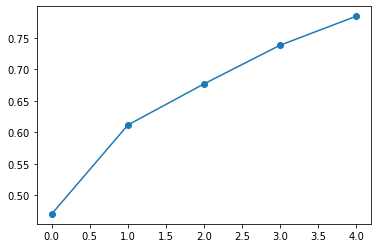

In [11]:
results["explained_var"]
plt.plot(results["explained_var"], 'o-')

In [12]:
scores=results['PC']
scores['lables']=df.Species
scores.head()

,PC1,PC2,PC3,PC4,PC5,lables
0,-3.019580,-2.823399,0.670234,-0.069715,0.865268,wyoming
1,3.499776,0.690652,-0.779688,-2.011836,1.802956,wyoming
2,-2.667033,-2.683478,-0.027861,0.091728,1.058165,wyoming
3,-1.647201,-2.941417,0.438928,-0.410229,2.450521,wyoming
4,-1.517476,-0.067614,0.625473,-0.815752,0.043904,wyoming


Also in scree plot we can see 5 components explained around 80% of variance

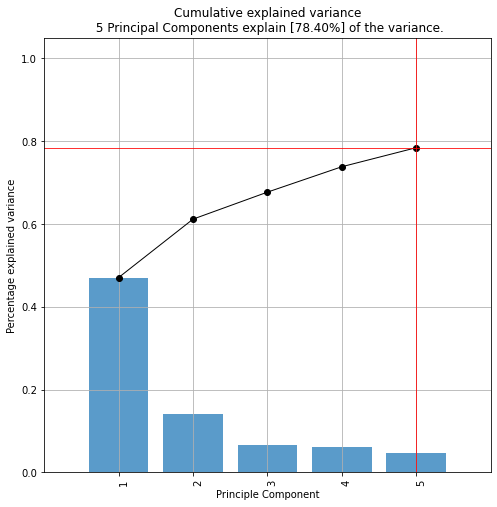

<Figure size 432x288 with 0 Axes>

In [13]:
P_model.plot(figsize=(8,8))
plt.show()

we can see 2 different categories one on the right side and one on the left but these categories do not follow the species so I think PCA is not very fit. Let's try the LDA.

[pca] >Plot PC1 vs PC2 with loadings.


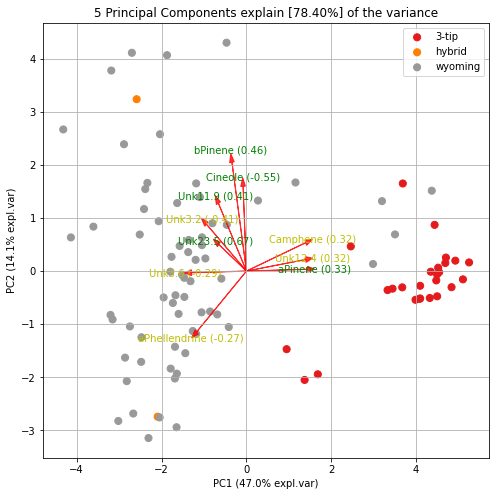

In [14]:
P_model.biplot( n_feat=10,legend=True, figsize=(8,8),y=y ,label=False)
plt.show()

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [78.40%] of the variance'}, xlabel='PC1 (47.0% expl.var)', ylabel='PC2 (14.1% expl.var)'>)

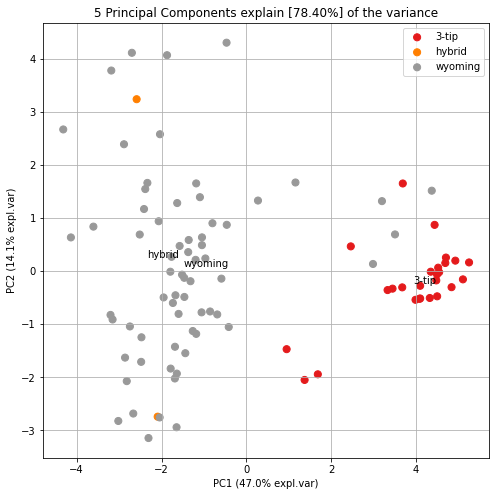

In [15]:

P_model.scatter(legend=True, label=True,y=df.Species,figsize=(8,8))

LDA

In [16]:
X=df.iloc[:,2:]
y=df.iloc[:,1]
X=StandardScaler().fit_transform(X)


In [17]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X,y)


LinearDiscriminantAnalysis()

Perform KFOLD, as it introduces less bias and less optimistic estimate.

In [18]:
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=0)
scores = cross_val_score(LDA_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean accuracy: {:.3f} {:.3f}'.format(np.mean(scores), np.std(scores)))

Mean accuracy: 0.947 0.032


In [19]:
pred = LDA_model.predict(X)

In [20]:
accuracy = (y == pred).sum() / y.size
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.989


the accuracy of LDA is very good so with this model we can predict the species of the samples, based on features. as we expected before LDA is the best model to find the best prediction.